In [21]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [22]:
"""Implement a KNN model to classify the animals in to categorie"""

'Implement a KNN model to classify the animals in to categorie'

In [23]:
# load the data set using pandas
data=pd.read_csv("E:\\KNN\\Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [24]:
# creating a dataframe using pandas.
df=pd.DataFrame(data)
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [25]:
# now we have to perform EDA
df.shape

(101, 18)

In [26]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [27]:
# checking if there are any null values in the whole data using isna and sum function

df.isna().sum()

# we can see that  there are no null values in the whole data

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop("animal name",axis=1))

StandardScaler()

In [45]:
scaled_features = scaler.transform(df.drop("animal name",axis=1))
scaled_features

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  0.55839574],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  1.99224243],
       [-0.86103386,  2.01246118,  0.84372057, ..., -0.38435306,
        -0.87859537, -0.39750205]])

In [48]:
new_df = pd.DataFrame(scaled_features,columns=df.columns[:-1])
new_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,0.558396
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_features, df["type"], test_size=0.3) 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [52]:
pred = knn.predict(X_test)

In [54]:
# Predictions and Evaluation metrics :

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [55]:
print(confusion_matrix(y_test,pred))

[[17  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  1  1  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  2]]


In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.83      1.00      0.91         5
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.93      0.88      0.88        31
weighted avg       0.95      0.94      0.93        31



<AxesSubplot: >

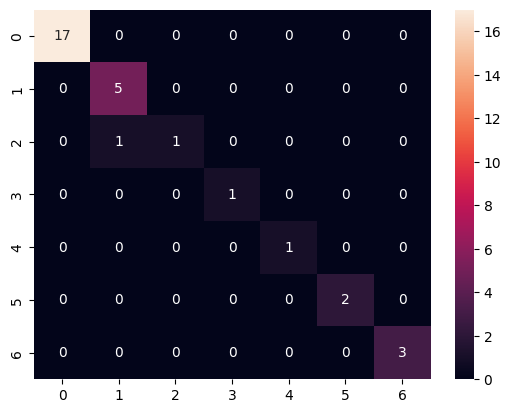

In [69]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

In [58]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,new_df,df["type"],cv=10)
    accuracy_rate.append(score.mean())

In [59]:
error_rate = []

for i in range(1,40) :
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

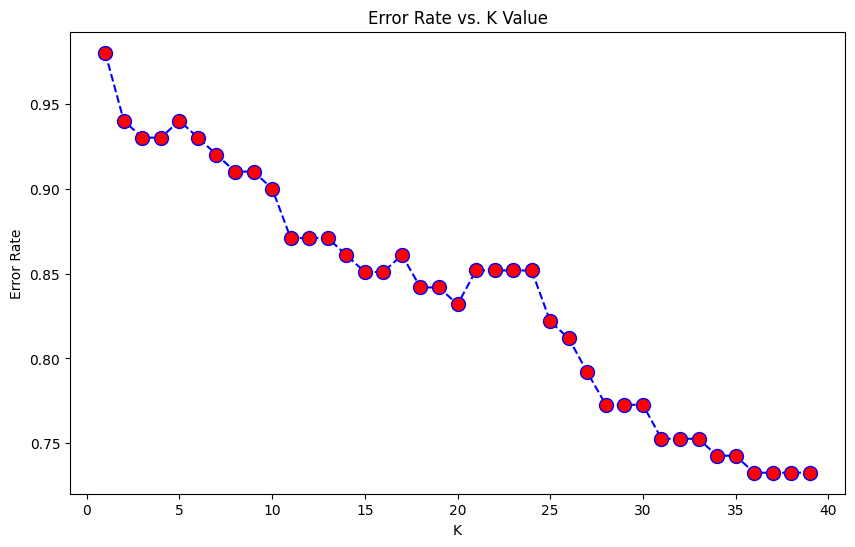

In [60]:
# plotting the accuracy rate on the graph along with the k-values
plt.figure(figsize = (10,6))
plt.plot(range(1,40),accuracy_rate,color="blue",linestyle="dashed",
        marker = "o", markerfacecolor = "red",markersize=10 )
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# we can see that the accuracy keeps decreasing after k=1

In [65]:
# as the k value is 2 the accuracy and metrics score will be

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("K=2")
print("\n")
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))
k_2=(accuracy_score(y_test,pred))

K=2


[[17  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  1  1  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  2]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.83      1.00      0.91         5
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.93      0.88      0.88        31
weighted avg       0.95      0.94      0.93        31

0.9354838709677419


In [67]:
# as the k value is 1 the accuracy and metrics score will be

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("K=1")
print("\n")
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))
k_1=(accuracy_score(y_test,pred))

K=1


[[17  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  1  1  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.83      1.00      0.91         5
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.98      0.93      0.94        31
weighted avg       0.97      0.97      0.96        31

0.967741935483871


In [64]:
# or we can go with the for loop also
for i in range(1,10,1):
    knn_model=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    y_pred=knn_model.predict(X_test)
    print('K value is: ',i)
    print(accuracy_score(y_test,y_pred))

K value is:  1
0.967741935483871
K value is:  2
0.9354838709677419
K value is:  3
0.9032258064516129
K value is:  4
0.9354838709677419
K value is:  5
0.9032258064516129
K value is:  6
0.9032258064516129
K value is:  7
0.9032258064516129
K value is:  8
0.9032258064516129
K value is:  9
0.8709677419354839


In [68]:
k_3=0.9032258064516129
k_4=0.9354838709677419
k_5=0.9032258064516129
#make a table containing accuracy score value for each value of k_neighbors
scores={'KNN Model':['n_neighbors=1','n_neighbors=2',"n_neighbors=3","n_neighbors=4","n_neighbors=5"],'Accuracy_scores':[k_1,k_2,k_3,k_4,k_5]}
table=pd.DataFrame(scores)
table
# as we can see that the accuracy score starts decrasing from 5 so its better to go with k values as 1 on this dataset.

,KNN Model,Accuracy_scores
0,n_neighbors=1,0.967742
1,n_neighbors=2,0.935484
2,n_neighbors=3,0.903226
3,n_neighbors=4,0.935484
4,n_neighbors=5,0.903226


In [70]:
""" as the accuracy metrics of k_neighbors=1 is we can go with categorizing the animals as 1 category each and seperate them individually as the model says"""

' as the accuracy metrics of k_neighbors=1 is we can go with categorizing the animals as 1 category each and seperate them individually as the model says'

In [71]:
"""or other thoughts we can go with k_2 or k_4 as they also have the second highest accuracy but its better to go with each category as individual fro better results """

'or other thoughts we can go with k_2 or k_4 as they also have the second highest accuracy but its better to go with each category as individual fro better results '